In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
tissue_data_d = '/home/lucytian/data/1_Single_Cell_PRS/2_cV2F/mvp_afr_0.9_0.01/20231221/406k_geno_v2_UKB_18PCs/fit_w_val/'
ti='LUNG'
tr='INI1003063'
df = pd.read_csv(tissue_data_d + ti + '/' + tr + '/snpnet.BETAs.tsv.gz', sep='\t', compression='gzip')
df = df.iloc[23:, :]

In [3]:
baseline_data_d ='/home/lucytian/data/1_Single_Cell_PRS/2_cV2F/baselines/406k_geno_v2_UKB_18PCs/fit_w_val/'
b_df = pd.read_csv(baseline_data_d + '/' + tr + '/snpnet.BETAs.tsv.gz', sep='\t', compression='gzip')
b_df = b_df.iloc[23:, :]

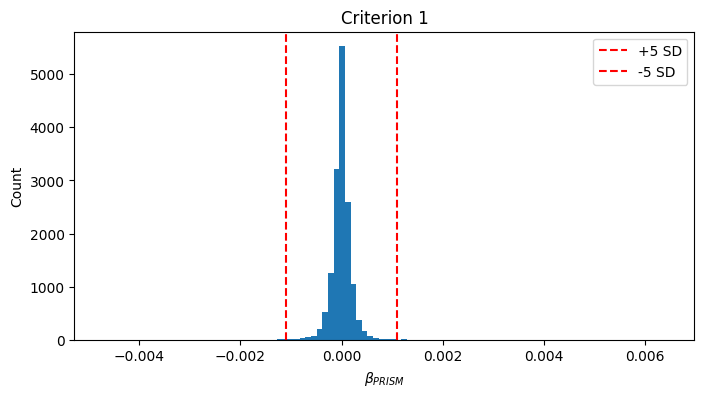

In [4]:
std = df['BETA'].std()
union = pd.concat([b_df, df])
val = (union['BETA'].max() - union['BETA'].min()) / 20

plt.figure(figsize=(8,4))
plt.hist(df['BETA'], bins=100)
plt.axvline(5 * std, color='red', linestyle='--', label='+5 SD')
plt.axvline(-5 * std, color='red', linestyle='--', label='-5 SD')
plt.legend()
plt.xlabel(r'$\beta_{PRISM}$')
plt.ylabel('Count')
plt.title('Criterion 1')
plt.show()

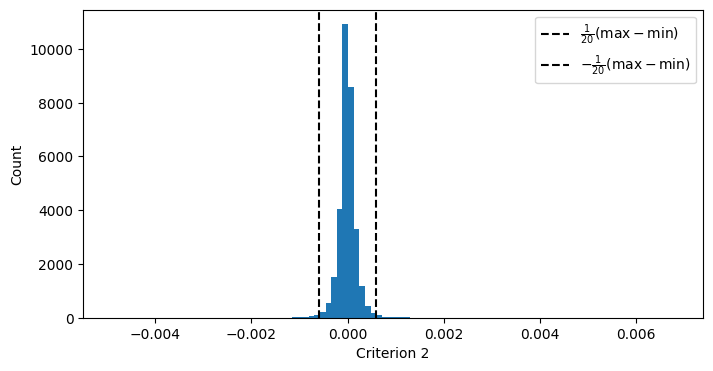

In [5]:
val = (union['BETA'].max() - union['BETA'].min()) / 20

# Plot the histogram
plt.figure(figsize=(8,4))
plt.hist(union['BETA'], bins=100)

# Add a vertical line at that position
plt.axvline(val, color='black', linestyle='--', label=rf'$\frac{{1}}{{20}}(\max - \min)$');
plt.axvline(-val, color='black', linestyle='--', label=rf'$-\frac{{1}}{{20}}(\max - \min)$');
plt.xlabel(r'Criterion 2');
plt.ylabel('Count')
plt.legend()